### WORK VS HOME COMPARISON

/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/2003367894.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/2003367894.py:51: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(figures_dir / '01_work_vs_home_comparison.png', dpi=300, bbox_inches='tight')


Saved: /Users/khasrurrahman/Desktop/Interdisciplinary Project/figures/01_work_vs_home_comparison.png


/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


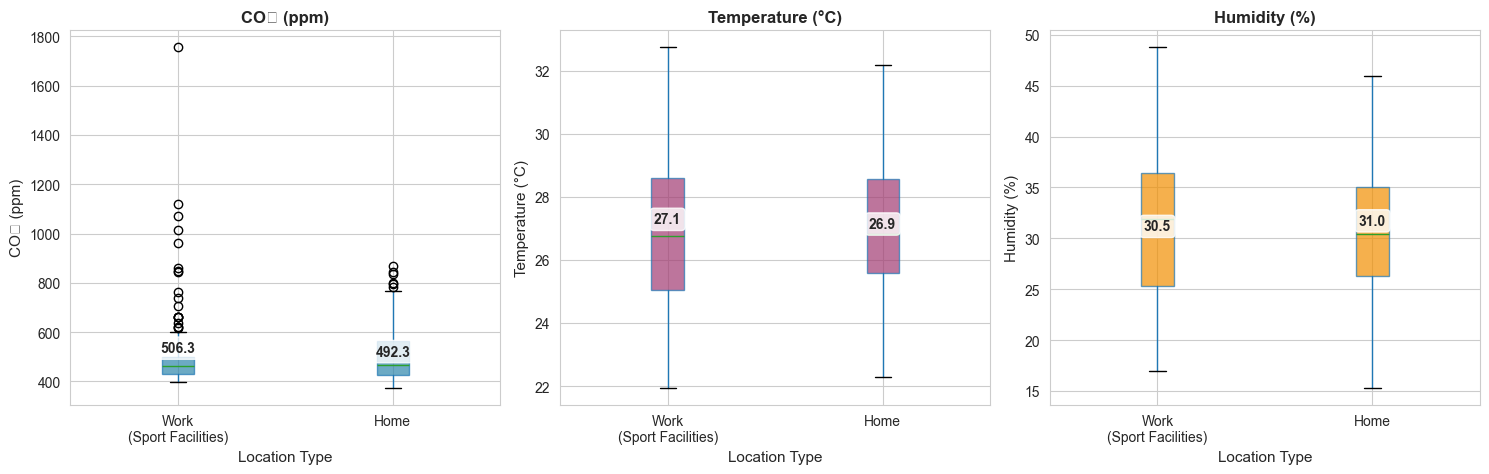


Summary statistics:
                 ac_mean_co2         ac_mean_temp       ac_mean_humidity      
                        mean     std         mean   std             mean   std
ac_location_type                                                              
home                  492.34  128.21        26.92  2.18            31.03  7.26
work                  506.33  104.83        27.06  2.09            30.48  5.87


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

script_dir = Path().absolute()
project_root = script_dir.parent.parent
df = pd.read_csv(project_root / 'Data' / 'integrated' / 'unified_dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

location_data = df[df['ac_location_type'].notna()].copy()

if len(location_data) > 0:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Air Quality: Work (Sport Facilities) vs Home', fontsize=16, fontweight='bold')
    
    air_vars = ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']
    labels = ['CO₂ (ppm)', 'Temperature (°C)', 'Humidity (%)']
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    for idx, (var, label, color) in enumerate(zip(air_vars, labels, colors)):
        bp = location_data.boxplot(column=var, by='ac_location_type', 
                                   ax=axes[idx], grid=True, patch_artist=True, return_type='dict')
        
        for patch in bp[var]['boxes']:
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        work_mean = location_data[location_data['ac_location_type'] == 'work'][var].mean()
        home_mean = location_data[location_data['ac_location_type'] == 'home'][var].mean()
        
        axes[idx].text(1, work_mean, f'{work_mean:.1f}', ha='center', va='bottom', 
                      fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        axes[idx].text(2, home_mean, f'{home_mean:.1f}', ha='center', va='bottom', 
                      fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        axes[idx].set_title(label, fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Location Type', fontsize=11)
        axes[idx].set_ylabel(label, fontsize=11)
        axes[idx].set_xticklabels(['Work\n(Sport Facilities)', 'Home'], fontsize=10)
        axes[idx].get_figure().suptitle('')
    
    plt.tight_layout()
    
    figures_dir = project_root / 'figures'
    figures_dir.mkdir(exist_ok=True)
    plt.savefig(figures_dir / '01_work_vs_home_comparison.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {figures_dir / '01_work_vs_home_comparison.png'}")
    
    plt.show()
    
    summary = location_data.groupby('ac_location_type')[air_vars].agg(['mean', 'std'])
    print("\nSummary statistics:")
    print(summary.round(2))

### ACTIVITY INTENSITY VS CO₂

Saved: /Users/khasrurrahman/Desktop/Interdisciplinary Project/figures/02_activity_intensity_vs_co2.png


/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/1805540779.py:36: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/1805540779.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(figures_dir / '02_activity_intensity_vs_co2.png', dpi=300, bbox_inches='tight')
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


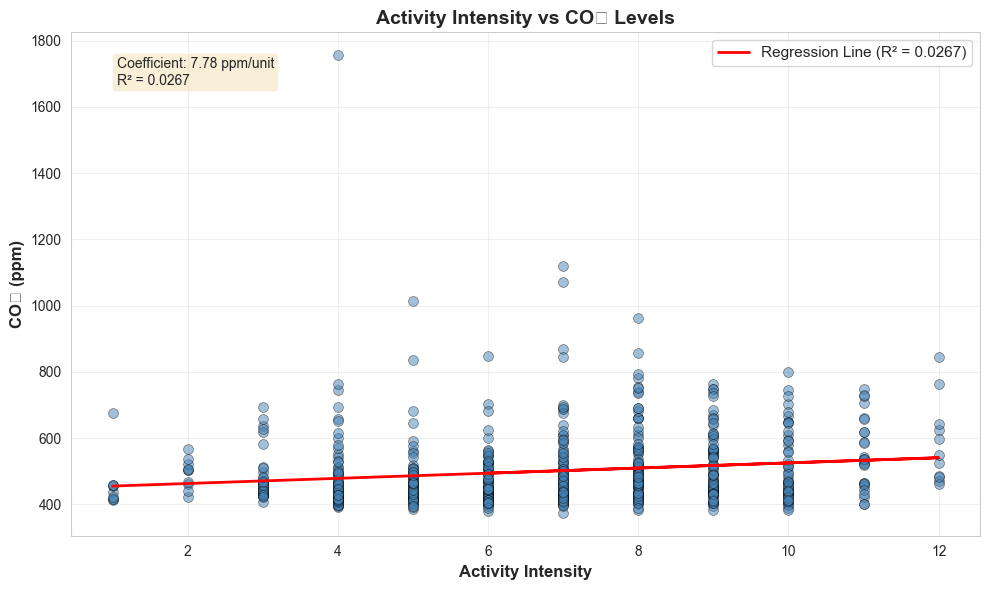

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

activity_data = df[
    (df['ac_mean_co2'].notna()) &
    (df['tired'].notna()) &
    (df['productive'].notna())
].copy()

if len(activity_data) > 0:
    activity_data['activity_intensity'] = activity_data['tired'] - activity_data['productive'] + 7
    
    X = activity_data[['activity_intensity']]
    y = activity_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
    plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Regression Line (R² = {r2:.4f})')
    
    plt.xlabel('Activity Intensity', fontsize=12, fontweight='bold')
    plt.ylabel('CO₂ (ppm)', fontsize=12, fontweight='bold')
    plt.title('Activity Intensity vs CO₂ Levels', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    coef = model.coef_[0]
    plt.text(0.05, 0.95, f'Coefficient: {coef:.2f} ppm/unit\nR² = {r2:.4f}', 
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig(figures_dir / '02_activity_intensity_vs_co2.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {figures_dir / '02_activity_intensity_vs_co2.png'}")
    plt.show()

### MODEL COMPARISON

/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Saved: /Users/khasrurrahman/Desktop/Interdisciplinary Project/figures/03_model_comparison.png


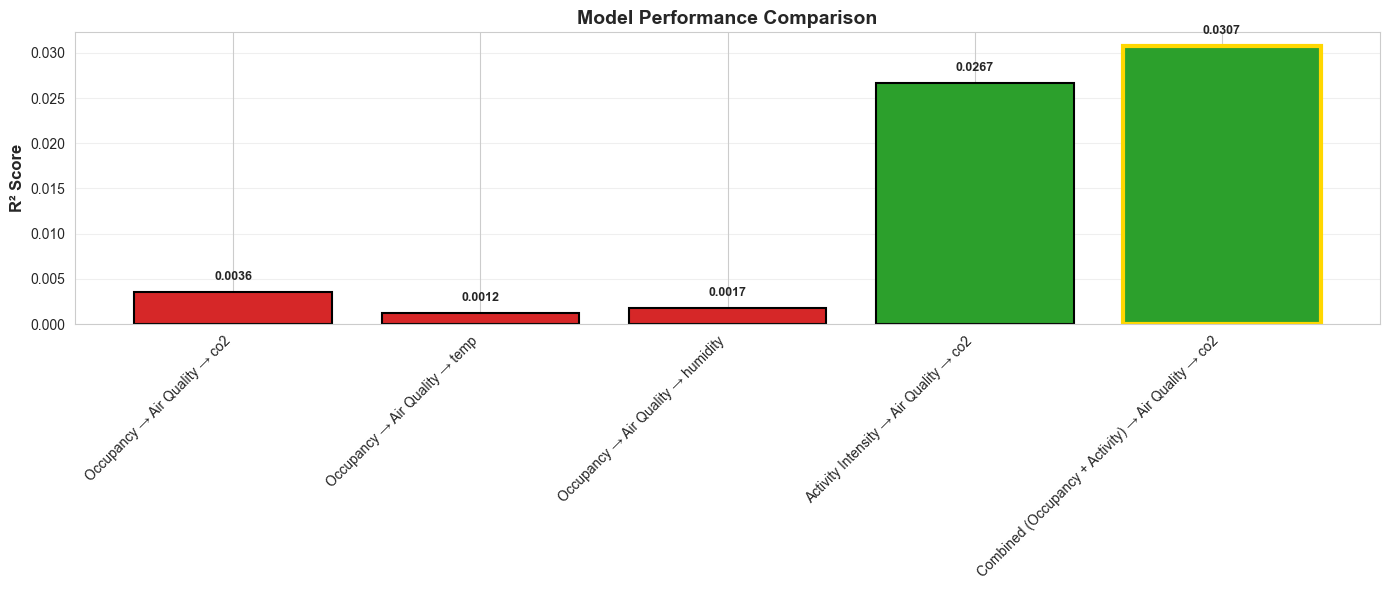


Model comparison results:
                                      Model_Type    Target      R²      RMSE
0                        Occupancy → Air Quality       co2  0.0036  114.8753
1                        Occupancy → Air Quality      temp  0.0012    2.1252
2                        Occupancy → Air Quality  humidity  0.0017    6.4690
3               Activity Intensity → Air Quality       co2  0.0267  113.5344
4  Combined (Occupancy + Activity) → Air Quality       co2  0.0307  113.2995


In [3]:
from sklearn.metrics import mean_squared_error

results = []

location_data = df[df['ac_location_type'].notna()].copy()
if len(location_data) > 0:
    location_data['occupancy_indicator'] = (location_data['ac_location_type'] == 'work').astype(int)
    
    for target in ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']:
        data = location_data[['occupancy_indicator', target]].dropna()
        if len(data) > 10:
            X = data[['occupancy_indicator']]
            y = data[target]
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            
            results.append({
                'Model_Type': 'Occupancy → Air Quality',
                'Target': target.replace('ac_mean_', ''),
                'R²': r2,
                'RMSE': rmse
            })

activity_data = df[
    (df['ac_mean_co2'].notna()) &
    (df['tired'].notna()) &
    (df['productive'].notna())
].copy()

if len(activity_data) > 0:
    activity_data['activity_intensity'] = activity_data['tired'] - activity_data['productive'] + 7
    data = activity_data[['activity_intensity', 'ac_mean_co2']].dropna()
    if len(data) > 10:
        X = data[['activity_intensity']]
        y = data['ac_mean_co2']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        results.append({
            'Model_Type': 'Activity Intensity → Air Quality',
            'Target': 'co2',
            'R²': r2,
            'RMSE': rmse
        })

combined_data = df[
    (df['ac_mean_co2'].notna()) &
    (df['ac_location_type'].notna()) &
    (df['tired'].notna()) &
    (df['productive'].notna())
].copy()

if len(combined_data) > 0:
    combined_data['occupancy_indicator'] = (combined_data['ac_location_type'] == 'work').astype(int)
    combined_data['activity_intensity'] = combined_data['tired'] - combined_data['productive'] + 7
    combined_data['hour'] = combined_data['timestamp'].dt.hour
    combined_data['peak_hour'] = (((combined_data['hour'] >= 8) & (combined_data['hour'] <= 12)) | 
                                  ((combined_data['hour'] >= 17) & (combined_data['hour'] <= 20))).astype(int)
    
    data = combined_data[['occupancy_indicator', 'activity_intensity', 'peak_hour', 'ac_mean_co2']].dropna()
    if len(data) > 10:
        X = data[['occupancy_indicator', 'activity_intensity', 'peak_hour']]
        y = data['ac_mean_co2']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        results.append({
            'Model_Type': 'Combined (Occupancy + Activity) → Air Quality',
            'Target': 'co2',
            'R²': r2,
            'RMSE': rmse
        })

results_df = pd.DataFrame(results)

plt.figure(figsize=(14, 6))
colors = ['#d62728' if r2 < 0.01 else '#ff7f0e' if r2 < 0.02 else '#2ca02c' 
          for r2 in results_df['R²']]

bars = plt.bar(range(len(results_df)), results_df['R²'], color=colors, edgecolor='black', linewidth=1.5)

for i, (bar, r2) in enumerate(zip(bars, results_df['R²'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{r2:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(range(len(results_df)), 
           results_df['Model_Type'] + ' → ' + results_df['Target'], 
           rotation=45, ha='right', fontsize=10)
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

best_idx = results_df['R²'].idxmax()
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.savefig(figures_dir / '03_model_comparison.png', dpi=300, bbox_inches='tight')
print(f"Saved: {figures_dir / '03_model_comparison.png'}")
plt.show()

print("\nModel comparison results:")
print(results_df.round(4))

### FEATURE IMPORTANCE

Saved: /Users/khasrurrahman/Desktop/Interdisciplinary Project/figures/04_feature_importance.png


/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/3870598487.py:28: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/3870598487.py:29: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(figures_dir / '04_feature_importance.png', dpi=300, bbox_inches='tight')
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


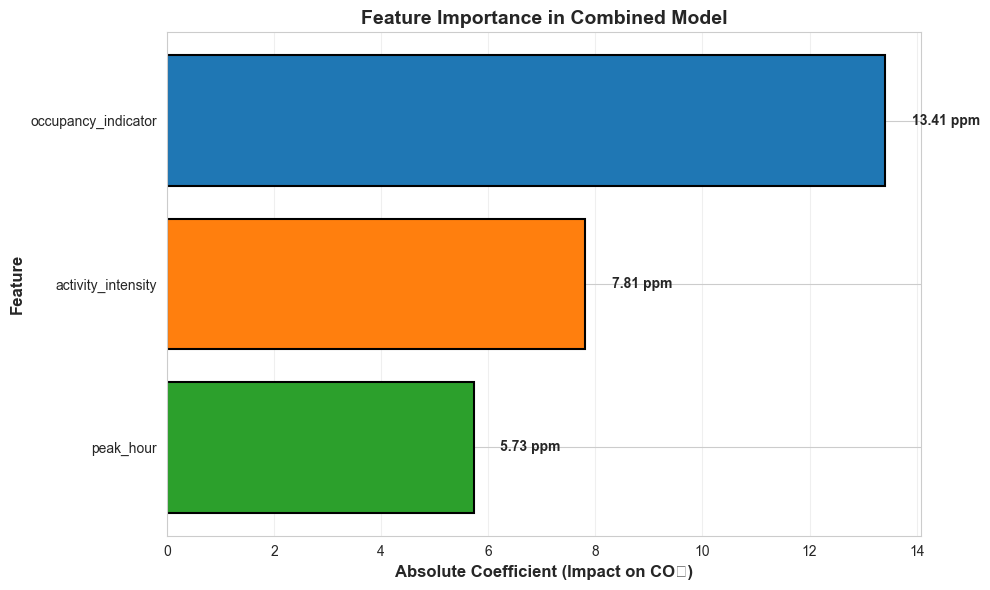


Feature importance:
               Feature  Abs_Coefficient
2            peak_hour         5.728463
1   activity_intensity         7.807459
0  occupancy_indicator        13.414922


In [4]:
if len(combined_data) > 0:
    features = ['occupancy_indicator', 'activity_intensity', 'peak_hour']
    X = combined_data[features]
    y = combined_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    
    importance = pd.DataFrame({
        'Feature': features,
        'Abs_Coefficient': np.abs(model.coef_)
    }).sort_values('Abs_Coefficient', ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
    bars = plt.barh(importance['Feature'], importance['Abs_Coefficient'], 
                    color=colors, edgecolor='black', linewidth=1.5)
    
    for bar, val in zip(bars, importance['Abs_Coefficient']):
        plt.text(val + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{val:.2f} ppm', va='center', fontsize=10, fontweight='bold')
    
    plt.xlabel('Absolute Coefficient (Impact on CO₂)', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance in Combined Model', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig(figures_dir / '04_feature_importance.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {figures_dir / '04_feature_importance.png'}")
    plt.show()
    
    print("\nFeature importance:")
    print(importance)

#### ACTUAL VS PREDICTED CO₂

/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/1715554101.py:39: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/bk/6vf1h4pj3b90nbk5d4ckllh00000gn/T/ipykernel_9609/1715554101.py:40: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(figures_dir / '05_actual_

Saved: /Users/khasrurrahman/Desktop/Interdisciplinary Project/figures/05_actual_vs_predicted.png


/Users/khasrurrahman/Desktop/Interdisciplinary Project/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


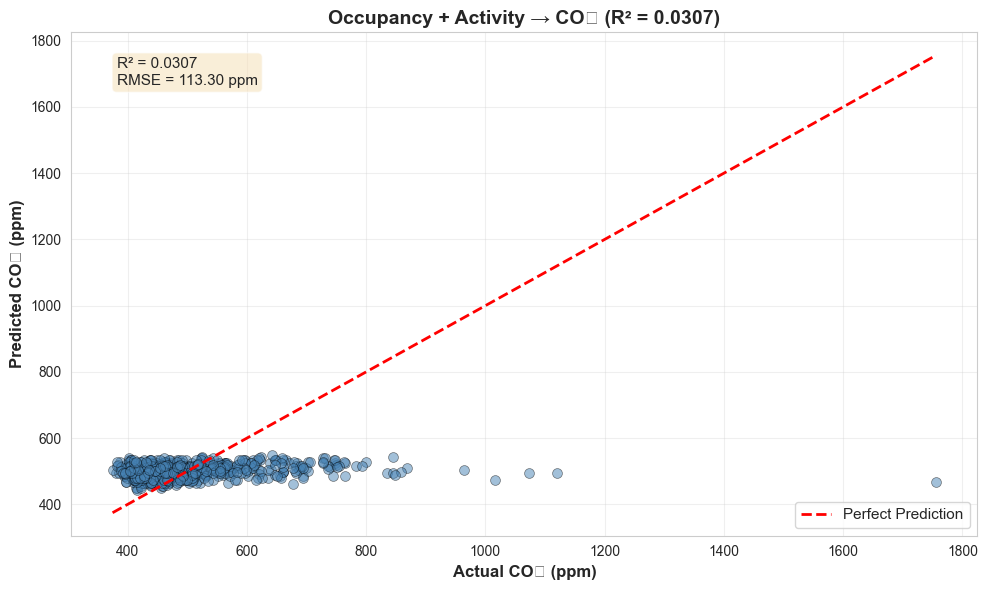

In [5]:
combined_data = df[
    (df['ac_mean_co2'].notna()) &
    (df['ac_location_type'].notna()) &
    (df['tired'].notna()) &
    (df['productive'].notna())
].copy()

if len(combined_data) > 0:
    combined_data['occupancy_indicator'] = (combined_data['ac_location_type'] == 'work').astype(int)
    combined_data['activity_intensity'] = combined_data['tired'] - combined_data['productive'] + 7
    combined_data['hour'] = combined_data['timestamp'].dt.hour
    combined_data['peak_hour'] = (((combined_data['hour'] >= 8) & (combined_data['hour'] <= 12)) | 
                                  ((combined_data['hour'] >= 17) & (combined_data['hour'] <= 20))).astype(int)
    
    features = ['occupancy_indicator', 'activity_intensity', 'peak_hour']
    X = combined_data[features]
    y = combined_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
    
    plt.xlabel('Actual CO₂ (ppm)', fontsize=12, fontweight='bold')
    plt.ylabel('Predicted CO₂ (ppm)', fontsize=12, fontweight='bold')
    plt.title(f'Occupancy + Activity → CO₂ (R² = {r2:.4f})', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    plt.text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.2f} ppm', 
             transform=plt.gca().transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig(figures_dir / '05_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {figures_dir / '05_actual_vs_predicted.png'}")
    plt.show()